Prithak Pradhanang
Python Week 
Remittance impact GDP growth of economy of Nepal and other economic factors that indirectly affect the the GDP. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fiscal_Year         9 non-null      object 
 1   Remittance_inflows  9 non-null      float64
 2   GDP_growthrate      9 non-null      float64
 3   Foreign_Assets      9 non-null      float64
 4   Broad_Money_M2      9 non-null      float64
 5   Domestic_Credit     9 non-null      float64
 6   Foreign_Exchange    9 non-null      float64
dtypes: float64(6), object(1)
memory usage: 632.0+ bytes
Missing values per column:
Fiscal_Year           0
Remittance_inflows    0
GDP_growthrate        0
Foreign_Assets        0
Broad_Money_M2        0
Domestic_Credit       0
Foreign_Exchange      0
dtype: int64
Cleaned Data Preview:
  Fiscal_Year  Remittance_inflows  GDP_growthrate  Foreign_Assets  \
0   2014/2015              617.28             3.0        847678.7   
1   2015/2016              665.06 

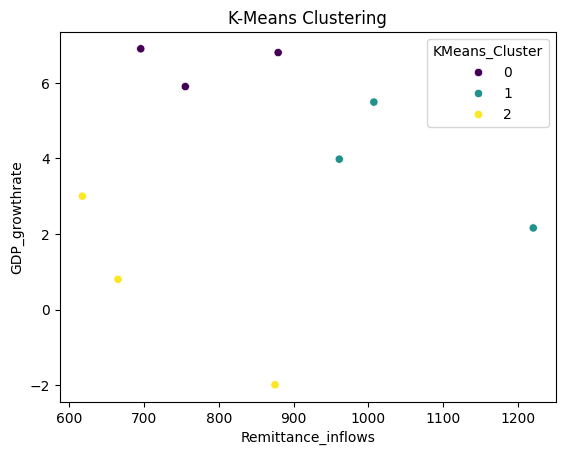

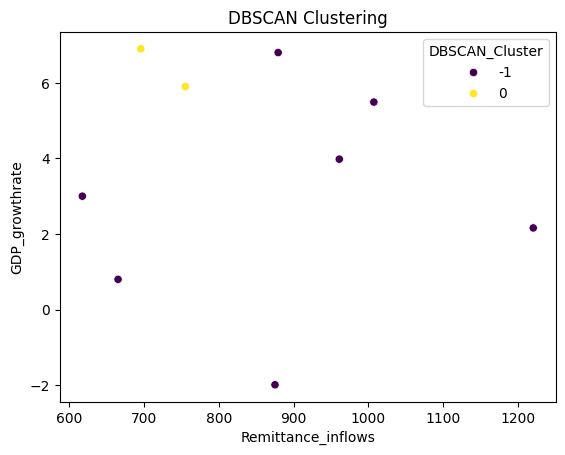

K-Means Cluster Summary:
                Remittance_inflows  GDP_growthrate
KMeans_Cluster                                    
0                       776.593333        6.533333
1                      1062.973333        3.876667
2                       719.123333        0.603333


In [1]:
# Remittance Impact Analysis
# Objective: Analyze the impact of remittance on Nepal’s economy

# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the dataset
data = {
    'Fiscal_Year': ['2014/2015', '2015/2016', '2016/2017', '2017/2018', '2018/2019', 
                    '2019/2020', '2020/2021', '2021/2022', '2022/2023'],
    'Remittance_inflows': [617.28, 665.06, 695.45, 755.06, 879.27, 
                           875.03, 961.05, 1007.31, 1220.56],
    'GDP_growthrate': [3.0, 0.8, 6.9, 5.9, 6.8, -1.99, 3.98, 5.49, 2.16],
    'Foreign_Assets': [847678.7, 1069789.5, 1107823.5, 1133295.2, 1073526.6, 
                       1449927.6, 1453294.9, 1304086.8, 1633729.1],
    'Broad_Money_M2': [1877801.5, 2244578.6, 2591702.0, 3094466.6, 3582137.7, 
                       4230969.8, 5154853.2, 5505400.8, 6130483.4],
    'Domestic_Credit': [1527345.9, 1805736.0, 2177792.0, 2755893.0, 3338509.8, 
                        3897627.9, 4955476.5, 5673573.6, 6168905.0],
    'Foreign_Exchange': [703060.9, 887010.8, 927266.4, 989396.3, 902443.9, 
                         1226122.3, 1244633.6, 1056394.6, 1345776.4]
}
data = pd.DataFrame(data)

# 1. Data Cleaning
# Displaying basic information about the dataset
data.info()

# Checking for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Checking for duplicates
data = data.drop_duplicates()

# Displaying the first few rows of the cleaned dataset
print("Cleaned Data Preview:")
print(data.head())

# 2. Feature Engineering
# Selecting relevant features for clustering (normalize numerical features)
features = ['Remittance_inflows', 'GDP_growthrate']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# 3. Model Implementation
# 3.1 K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
data['KMeans_Cluster'] = kmeans_labels

# 3.2 DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(data_scaled)
data['DBSCAN_Cluster'] = dbscan_labels

# 4. Model Evaluation
# K-Means Evaluation
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(data_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"K-Means Davies-Bouldin Index: {kmeans_davies_bouldin}")

# DBSCAN Evaluation
# For DBSCAN, we evaluate only if clusters were found (labels not -1)
dbscan_clusters = data['DBSCAN_Cluster'].unique()
if len(dbscan_clusters) > 1:
    dbscan_silhouette = silhouette_score(data_scaled, dbscan_labels)
    dbscan_davies_bouldin = davies_bouldin_score(data_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
    print(f"DBSCAN Davies-Bouldin Index: {dbscan_davies_bouldin}")
else:
    print("DBSCAN did not find meaningful clusters.")

# 5. Visualization
# Visualizing K-Means Clusters
sns.scatterplot(x=data[features[0]], y=data[features[1]], hue=data['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

# Visualizing DBSCAN Clusters
sns.scatterplot(x=data[features[0]], y=data[features[1]], hue=data['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

# 6. Insights and Conclusion
# Analyzing the clusters and their implications for remittance impact on GDP
kmeans_summary = data.groupby('KMeans_Cluster')[features].mean()
print("K-Means Cluster Summary:")
print(kmeans_summary)

# Save the cleaned and clustered data for further use
data.to_csv('remittance_gdp_clustered.csv', index=False)


   Year  Total_Deposits  Demand_Deposits  Saving_Deposits  \
0  2016       2016816.2         183460.3         873679.6   
1  2017       2299807.6         199047.2         814153.0   
2  2018       2742102.9         256298.4         946821.9   
3  2019       3235066.8         312601.5        1060334.7   
4  2020       3839727.4         385837.9        1224454.9   
5  2021       4662729.3         486192.6        1593008.3   
6  2022       5082769.3         451151.3        1402175.9   
7  2023       5710015.9         441983.6        1518857.2   

   Fixed_and_Call_Deposits  Margin_Deposits  Foreign_Liabilities  \
0                 943739.5          15936.8                  0.0   
1                 993425.8          20839.6                  0.0   
2                1516650.0          22332.6                  0.0   
3                1838634.0          23496.6               3298.5   
4                2205540.2          23894.5              14775.7   
5                2550701.0          32827.

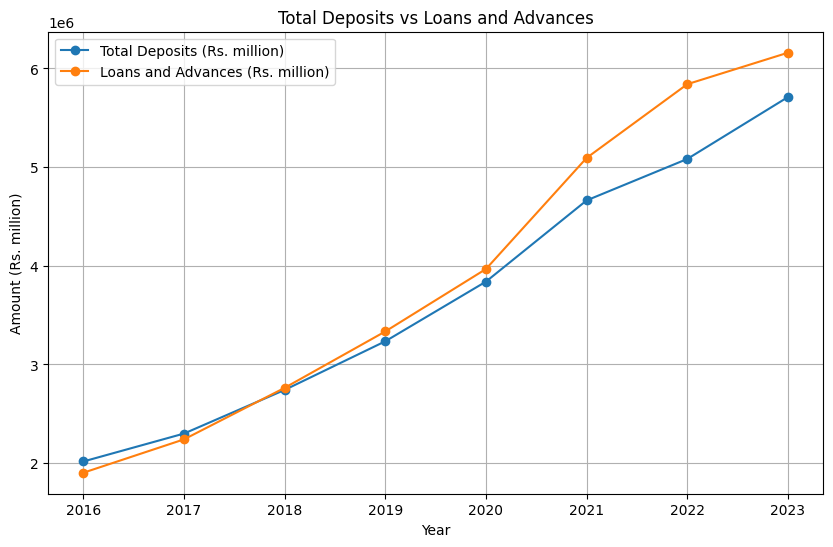

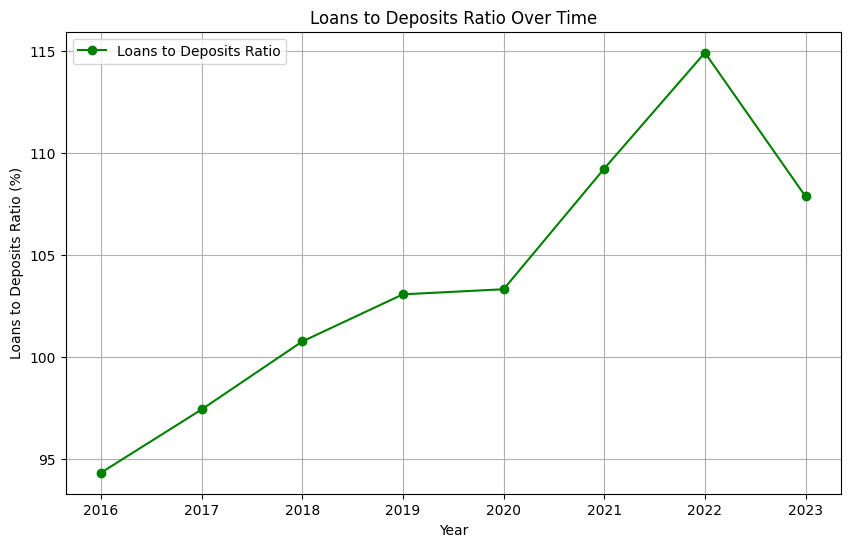

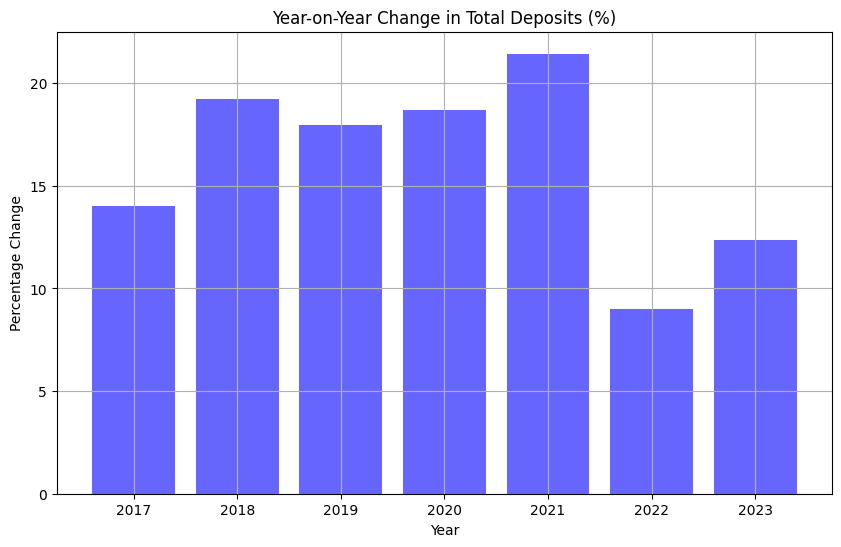

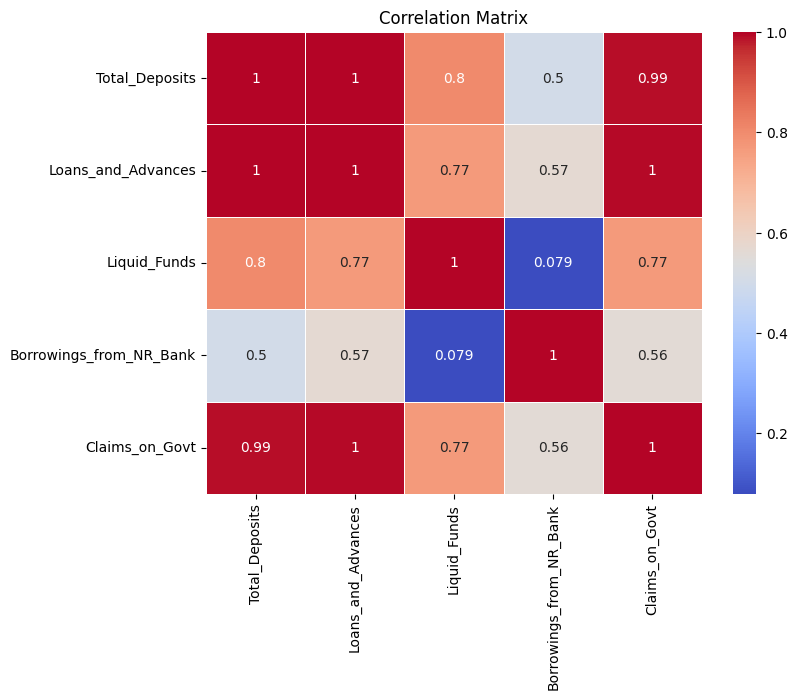

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data - Enter the data from your table as a dictionary
data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "Total_Deposits": [2016816.2, 2299807.6, 2742102.9, 3235066.8, 3839727.4, 4662729.3, 5082769.3, 5710015.9],
    "Demand_Deposits": [183460.3, 199047.2, 256298.4, 312601.5, 385837.9, 486192.6, 451151.3, 441983.6],
    "Saving_Deposits": [873679.6, 814153.0, 946821.9, 1060334.7, 1224454.9, 1593008.3, 1402175.9, 1518857.2],
    "Fixed_and_Call_Deposits": [943739.5, 993425.8, 1516650.0, 1838634.0, 2205540.2, 2550701.0, 3176578.8, 3709540.3],
    "Margin_Deposits": [15936.8, 20839.6, 22332.6, 23496.6, 23894.5, 32827.5, 52863.3, 39634.8],
    "Foreign_Liabilities": [0.0, 0.0, 0.0, 3298.5, 14775.7, 25748.0, 57973.0, 64406.5],
    "Borrowings_from_NR_Bank": [6710.2, 6937.3, 12230.3, 22904.8, 7487.5, 122703.9, 270063.7, 1497.8],
    "Liquid_Funds": [356814.4, 420597.2, 393460.5, 403971.4, 563643.9, 502055.9, 465361.0, 577731.0],
    "Loans_and_Advances": [1902759.4, 2240990.8, 2763288.2, 3334704.5, 3967508.9, 5093403.2, 5840568.3, 6159491.1],
    "Claims_on_Govt": [186369.1, 213894.6, 287540.6, 375886.3, 535393.6, 730841.0, 919998.0, 1003083.4],
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Add some derived columns (e.g., year-on-year change in Total Deposits)
df['Total_Deposits_Change'] = df['Total_Deposits'].pct_change() * 100  # Percentage change

# Compute additional derived statistics
df['Loans_to_Deposits_Ratio'] = df['Loans_and_Advances'] / df['Total_Deposits'] * 100

# Display the data
print(df)

# Visualization: Plot the Total Deposits and Loans over time
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Total_Deposits'], label="Total Deposits (Rs. million)", marker='o')
plt.plot(df['Year'], df['Loans_and_Advances'], label="Loans and Advances (Rs. million)", marker='o')
plt.title("Total Deposits vs Loans and Advances")
plt.xlabel("Year")
plt.ylabel("Amount (Rs. million)")
plt.legend()
plt.grid(True)
plt.show()

# Visualize the Loans to Deposits ratio
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Loans_to_Deposits_Ratio'], label="Loans to Deposits Ratio", marker='o', color='green')
plt.title("Loans to Deposits Ratio Over Time")
plt.xlabel("Year")
plt.ylabel("Loans to Deposits Ratio (%)")
plt.legend()
plt.grid(True)
plt.show()

# Visualizing the Year-on-Year Change in Total Deposits
plt.figure(figsize=(10, 6))
plt.bar(df['Year'][1:], df['Total_Deposits_Change'][1:], color='blue', alpha=0.6)
plt.title("Year-on-Year Change in Total Deposits (%)")
plt.xlabel("Year")
plt.ylabel("Percentage Change")
plt.grid(True)
plt.show()

# Correlation heatmap between some key variables
corr = df[['Total_Deposits', 'Loans_and_Advances', 'Liquid_Funds', 'Borrowings_from_NR_Bank', 'Claims_on_Govt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


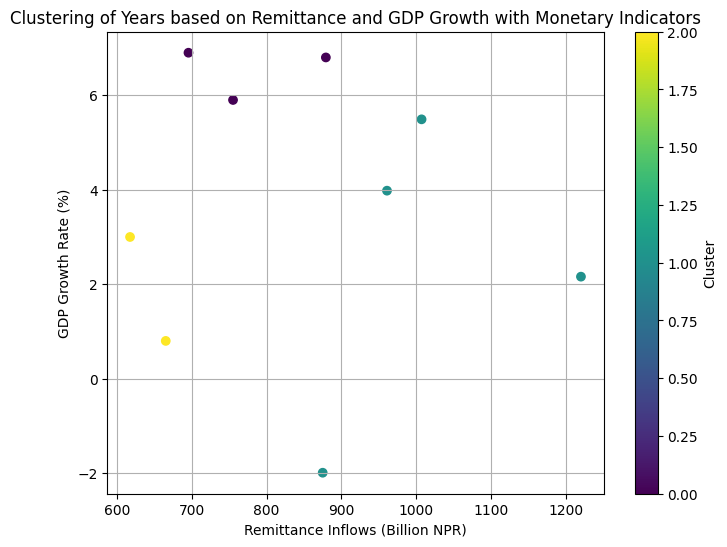

Cluster Centers:
[[-0.41999242  1.0146812  -0.53920205 -0.51241103 -0.51858756]
 [ 0.89769228 -0.44707421  0.98803819  0.99934668  0.98837062]
 [-1.16539594 -0.62787338 -1.1672733  -1.23007682 -1.19885989]]


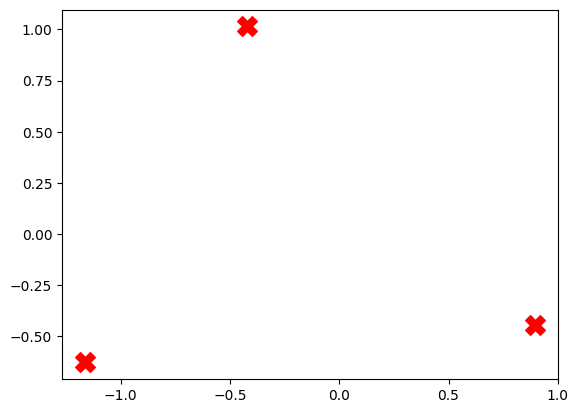

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Create DataFrame for remittance and GDP growth
data = {
    'Fiscal_Year': ['2014/2015', '2015/2016', '2016/2017', '2017/2018', '2018/2019', 
                    '2019/2020', '2020/2021', '2021/2022', '2022/2023'],
    'Remittance_inflows': [617.28, 665.06, 695.45, 755.06, 879.27, 
                           875.03, 961.05, 1007.31, 1220.56],
    'GDP_growthrate': [3.0, 0.8, 6.9, 5.9, 6.8, -1.99, 3.98, 5.49, 2.16],
    'Foreign_Assets': [847678.7, 1069789.5, 1107823.5, 1133295.2, 1073526.6, 
                       1449927.6, 1453294.9, 1304086.8, 1633729.1],
    'Broad_Money_M2': [1877801.5, 2244578.6, 2591702.0, 3094466.6, 3582137.7, 
                       4230969.8, 5154853.2, 5505400.8, 6130483.4],
    'Domestic_Credit': [1527345.9, 1805736.0, 2177792.0, 2755893.0, 3338509.8, 
                        3897627.9, 4955476.5, 5673573.6, 6168905.0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Select features for clustering
features = df[['Remittance_inflows', 'GDP_growthrate', 'Foreign_Assets', 'Broad_Money_M2', 'Domestic_Credit']]

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Let's start with 3 clusters
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 3: Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Remittance_inflows'], df['GDP_growthrate'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering of Years based on Remittance and GDP Growth with Monetary Indicators')
plt.xlabel('Remittance Inflows (Billion NPR)')
plt.ylabel('GDP Growth Rate (%)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Optional: Visualize the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.show()


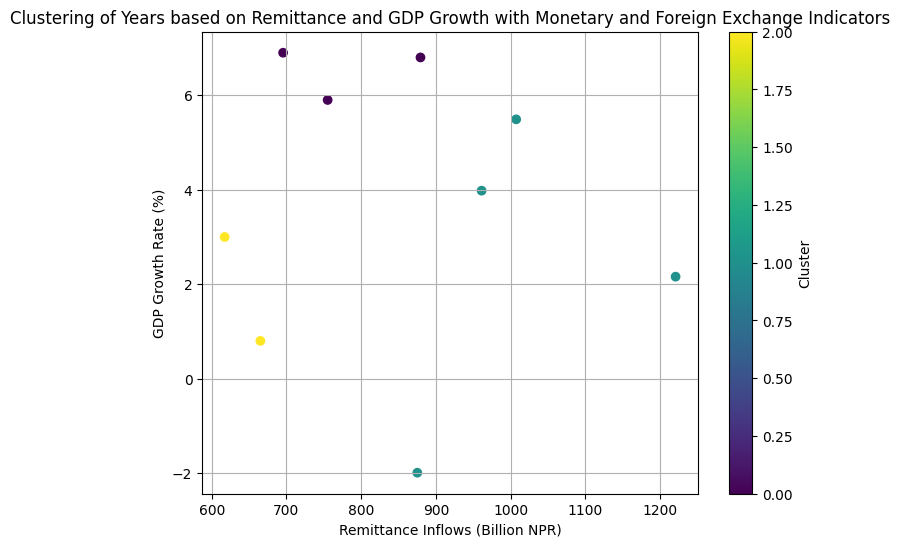

Cluster Centers:
[[-0.41999242  1.0146812  -0.53920205 -0.51241103 -0.51858756 -0.47098951]
 [ 0.89769228 -0.44707421  0.98803819  0.99934668  0.98837062  0.96048631]
 [-1.16539594 -0.62787338 -1.1672733  -1.23007682 -1.19885989 -1.21448836]]


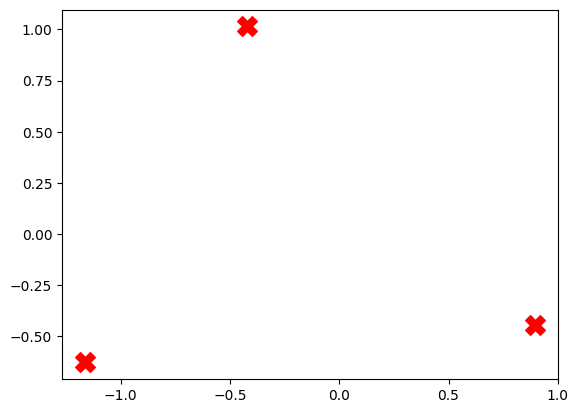

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample data for GDP, Remittance, and Foreign Exchange Data
data = {
    'Fiscal_Year': ['2014/2015', '2015/2016', '2016/2017', '2017/2018', '2018/2019', 
                    '2019/2020', '2020/2021', '2021/2022', '2022/2023'],
    'Remittance_inflows': [617.28, 665.06, 695.45, 755.06, 879.27, 
                           875.03, 961.05, 1007.31, 1220.56],
    'GDP_growthrate': [3.0, 0.8, 6.9, 5.9, 6.8, -1.99, 3.98, 5.49, 2.16],
    'Foreign_Assets': [847678.7, 1069789.5, 1107823.5, 1133295.2, 1073526.6, 
                       1449927.6, 1453294.9, 1304086.8, 1633729.1],
    'Broad_Money_M2': [1877801.5, 2244578.6, 2591702.0, 3094466.6, 3582137.7, 
                       4230969.8, 5154853.2, 5505400.8, 6130483.4],
    'Domestic_Credit': [1527345.9, 1805736.0, 2177792.0, 2755893.0, 3338509.8, 
                        3897627.9, 4955476.5, 5673573.6, 6168905.0],
    'Foreign_Exchange': [703060.9, 887010.8, 927266.4, 989396.3, 902443.9, 
                         1226122.3, 1244633.6, 1056394.6, 1345776.4]
}

# Create DataFrame
df = pd.DataFrame(data)

# Select features for clustering
features = df[['Remittance_inflows', 'GDP_growthrate', 'Foreign_Assets', 
               'Broad_Money_M2', 'Domestic_Credit', 'Foreign_Exchange']]

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Let's start with 3 clusters
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 3: Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Remittance_inflows'], df['GDP_growthrate'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering of Years based on Remittance and GDP Growth with Monetary and Foreign Exchange Indicators')
plt.xlabel('Remittance Inflows (Billion NPR)')
plt.ylabel('GDP Growth Rate (%)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Optional: Visualize the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.show()


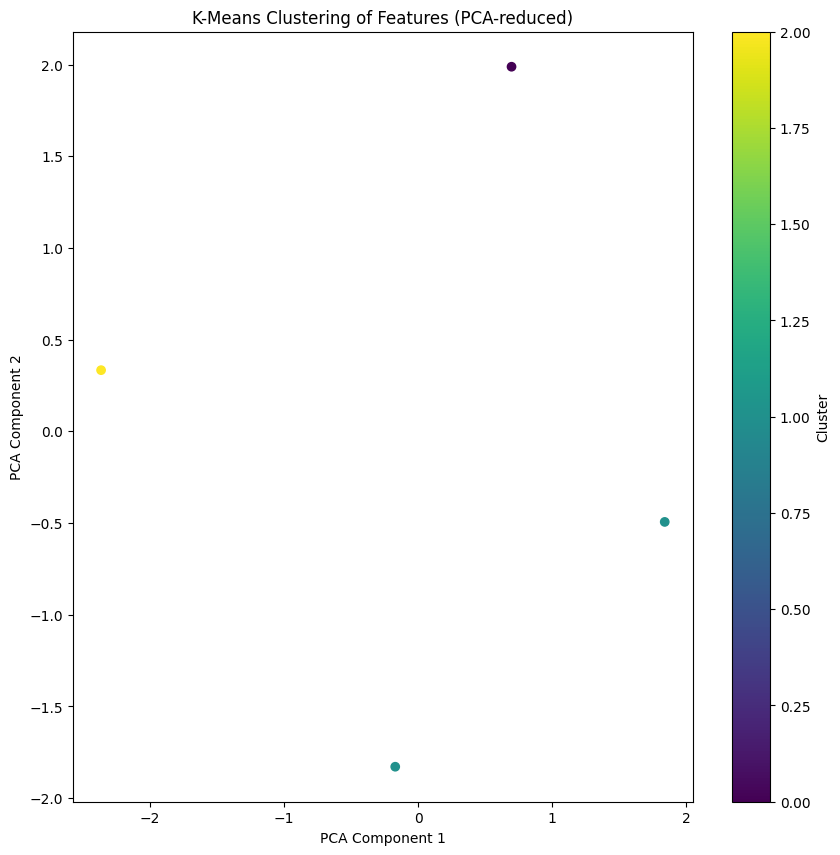

       Total_Deposits_Growth  Loans_Advances_Growth  Liquid_Funds_Growth  \
count               4.000000               4.000000             4.000000   
mean               15.368447              16.870984            11.359214   
std                 5.699254               9.519944            24.508761   
min                 9.008458               5.460475           -10.926757   
25%                11.507599              12.367072            -8.213385   
50%                15.515735              16.822798             8.418959   
75%                19.376583              21.326711            27.991557   
max                21.433863              28.377865            39.525694   

       Credit_Deposit_Ratio   Cluster  
count              4.000000  4.000000  
mean              92.525000  1.000000  
std                3.373796  0.816497  
min               89.400000  0.000000  
25%               90.075000  0.750000  
50%               91.950000  1.000000  
75%               94.400000  1.2500

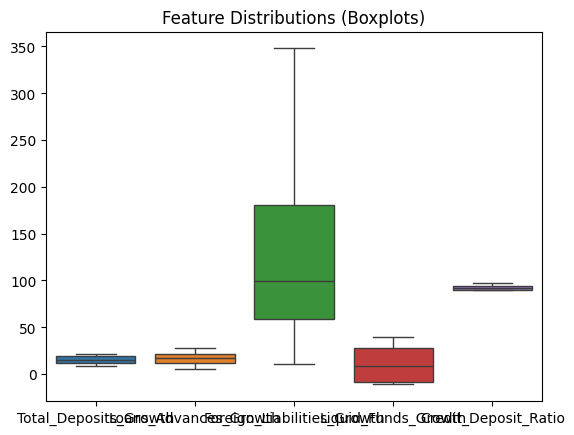

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'features' is your DataFrame containing the financial data
# Ensure your dataframe 'features' is loaded before proceeding.

# Step 1: Handle NaN and Infinite Values
# Replace infinities with NaN (if any), and then drop or replace NaN values
features_clean = features.replace([float('inf'), float('-inf')], pd.NA)  # Replace infinities with NaN

# Option 1: Drop rows with NaN or infinities (if needed)
features_clean = features_clean.dropna()  # Drop rows with NaN or infinities

# Option 2: Or replace NaN or inf with the mean of the respective column
# features_clean = features_clean.fillna(features_clean.mean())

# Step 2: Standardize the data
scaler = StandardScaler()

# Apply scaling only to numeric columns
scaled_features = scaler.fit_transform(features_clean)

# Step 3: Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Let's start with 3 clusters
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels back to the DataFrame for analysis
features_clean['Cluster'] = clusters

# Step 4: Visualize the clustering (optional)
# If you have multiple dimensions, use PCA or t-SNE to reduce them to 2D for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 10))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering of Features (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 5: Check for any large outliers or summary statistics (optional)
# Get summary statistics of the cleaned features
print(features_clean.describe())

# Visualize the distribution of the features using boxplots (optional)
sns.boxplot(data=features_clean.drop('Cluster', axis=1))  # Exclude the 'Cluster' column
plt.title('Feature Distributions (Boxplots)')
plt.show()


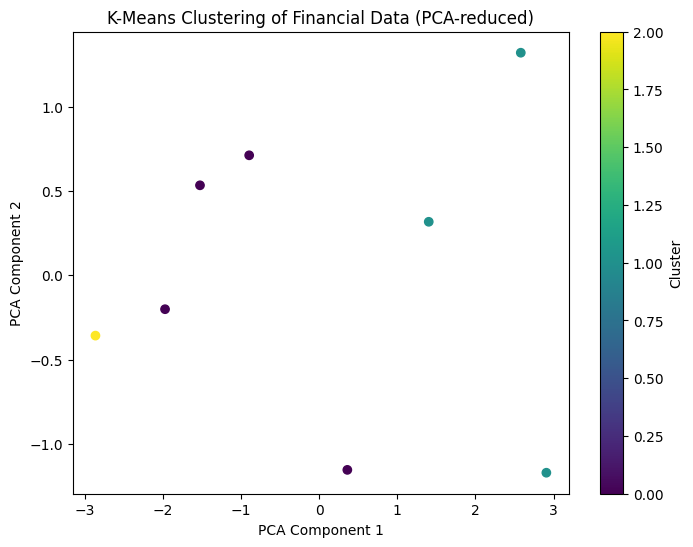

Cluster Centers (in the standardized space):
[[-0.52871365 -0.5476544  -0.65365129 -0.19793638 -0.24729492]
 [ 1.1476997   1.16901945  1.14997975  0.71868833  0.89152988]
 [-1.32824451 -1.31644076 -0.8353341  -1.36431945 -1.68540997]]
Cluster Summary:
         Total_Deposits  Loans_Advances  Foreign_Liabilities  Liquid_Funds  \
Cluster                                                                      
0          3.029176e+06    3.076623e+06          4518.550000     445418.25   
1          5.151838e+06    5.697821e+06         49375.833333     515049.30   
2          2.016816e+06    1.902759e+06             0.000000     356814.40   

         Credit_Deposit_Ratio  
Cluster                        
0                   89.825000  
1                   93.566667  
2                   85.100000  


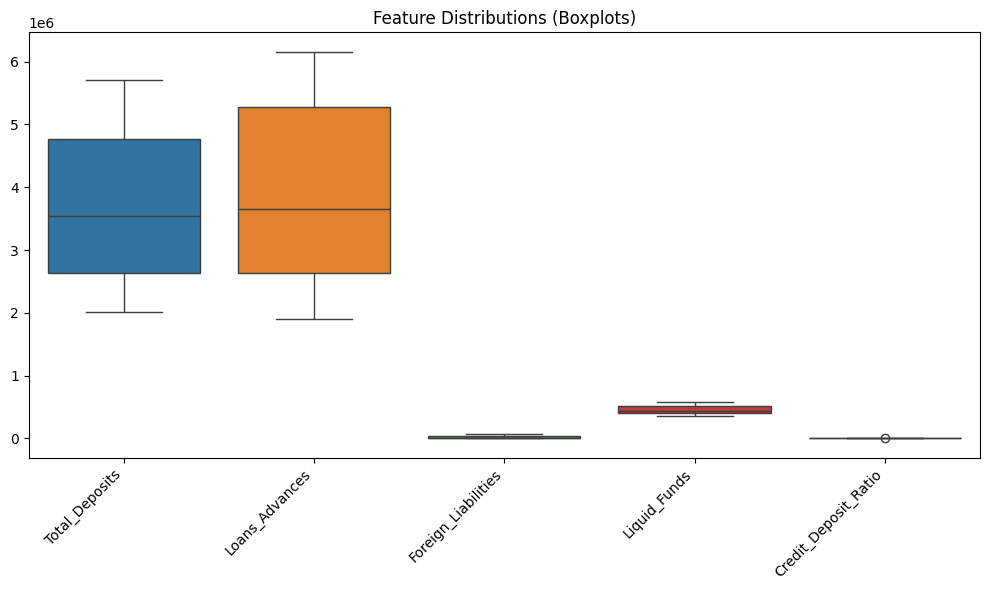

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Step 1: Load your data into a pandas DataFrame
data = {
    'Fiscal_Year': ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
    'Total_Deposits': [2016816.2, 2299807.6, 2742102.9, 3235066.8, 3839727.4, 
                       4662729.3, 5082769.3, 5710015.9],
    'Loans_Advances': [1902759.4, 2240990.8, 2763288.2, 3334704.5, 3967508.9, 
                       5093403.2, 5840568.3, 6159491.1],
    'Foreign_Liabilities': [0.0, 0.0, 0.0, 3298.5, 14775.7, 25748.0, 57973.0, 64406.5],
    'Liquid_Funds': [356814.4, 420597.2, 393460.5, 403971.4, 563643.9, 502055.9, 465361.0, 577731.0],
    'Credit_Deposit_Ratio': [85.1, 88.1, 90.3, 91.5, 89.4, 93.6, 96.8, 90.3]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Step 2: Data cleaning (if needed)
# Ensure there are no infinities or NaNs (your dataset looks clean, so we don't expect issues here)
df_clean = df.replace([float('inf'), float('-inf')], np.nan)  # Replace infinity values with NaN
df_clean = df_clean.dropna()  # Drop rows with NaN values (if any)

# Step 3: Select the relevant columns for clustering
# Here, we are clustering based on numerical features: Total_Deposits, Loans_Advances, Foreign_Liabilities, Liquid_Funds, Credit_Deposit_Ratio
features = df_clean[['Total_Deposits', 'Loans_Advances', 'Foreign_Liabilities', 'Liquid_Funds', 'Credit_Deposit_Ratio']]

# Step 4: Standardize the Data (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters based on your analysis
df_clean['Cluster'] = kmeans.fit_predict(scaled_features)  # Add the cluster labels to the DataFrame

# Step 6: Visualizing the clustering (Optional)
# Use PCA to reduce the dimensions for easy visualization (2D plot)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df_clean['Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering of Financial Data (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 7: Review the cluster centers (optional, to understand what each cluster represents)
print("Cluster Centers (in the standardized space):")
print(kmeans.cluster_centers_)

# Step 8: Analyze the cluster summary
# Ensure we're only calculating the mean of numeric columns (exclude 'Fiscal_Year' and 'Cluster')
cluster_summary = df_clean.drop(['Fiscal_Year'], axis=1).groupby('Cluster').mean()

print("Cluster Summary:")
print(cluster_summary)



# Step 9: Optional - Visualize feature distributions with boxplots
plt.figure(figsize=(10, 6))  # Increase figure size for better clarity
sns.boxplot(data=df_clean.drop(['Fiscal_Year', 'Cluster'], axis=1))  # Exclude the 'Fiscal_Year' and 'Cluster' columns

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right
plt.title('Feature Distributions (Boxplots)')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


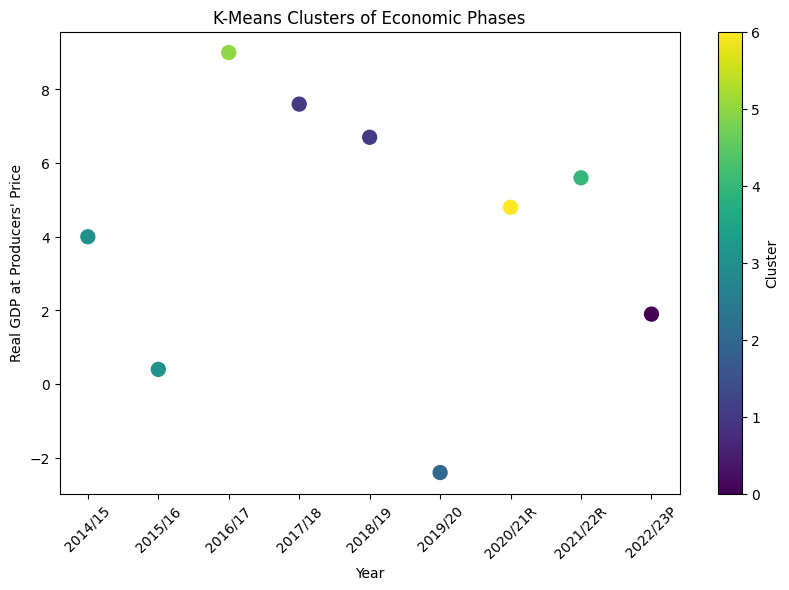

       Year  Cluster
0   2014/15        3
1   2015/16        3
2   2016/17        5
3   2017/18        1
4   2018/19        1
5   2019/20        2
6  2020/21R        6
7  2021/22R        4
8  2022/23P        0


In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data setup (replace with your actual dataset)
data = {
    'Year': ['2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21R', '2021/22R', '2022/23P'],
    'Real GDP at Producers\' Price': [4.0, 0.4, 9.0, 7.6, 6.7, -2.4, 4.8, 5.6, 1.9],
    'Nominal GDP at Producers\' Price': [8.6, 7.6, 18.0, 12.3, 11.7, 0.8, 11.9, 13.4, 9.1],
    'Gross National Disposable Income': [9.4, 8.0, 15.8, 9.7, 12.7, 0.5, 10.8, 11.6, 10.8],
    'National Consumer Price Index': [7.2, 9.9, 4.5, 4.2, 4.6, 6.2, 3.6, 6.3, 7.7],
    'Broad Money (M2)': [19.9, 19.5, 15.5, 19.4, 15.8, 18.1, 21.8, 6.8, 11.4],
    'Total Exports': [-7.3, -17.8, 4.2, 11.4, 19.4, 0.6, 44.4, 41.7, -21.4],
    'Total Imports': [8.4, -0.1, 28.0, 25.8, 13.9, -15.6, 28.7, 24.7, -16.1],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Feature selection for clustering (you can modify this based on your needs)
features = df[['Real GDP at Producers\' Price', 'Nominal GDP at Producers\' Price', 
               'Gross National Disposable Income', 'National Consumer Price Index',
               'Broad Money (M2)', 'Total Exports', 'Total Imports']]

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=45)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Real GDP at Producers\' Price'], c=df['Cluster'], cmap='viridis', s=100)
plt.title('K-Means Clusters of Economic Phases')
plt.xlabel('Year')
plt.ylabel('Real GDP at Producers\' Price')
plt.xticks(rotation=45)
plt.colorbar(label='Cluster')
plt.show()

# Check the cluster assignments
print(df[['Year', 'Cluster']])
